In [2]:
%matplotlib inline
import pandas as pd

In [3]:
titles = pd.read_csv('data/titles.csv')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [7]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack('character').fillna(0)
c

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [5]:
d = c.Superman - c.Batman
print('Superman years:')
len(d[d>0.0])

Superman years:


10

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [9]:
print('Batman years:')
len(d[d<0.0])

Batman years:


11

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

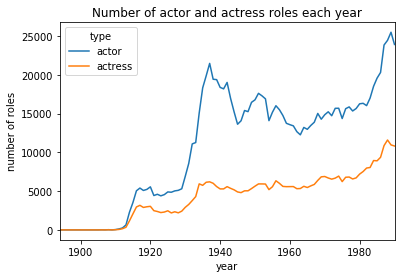

In [5]:
c=cast
c=c.groupby(['year', 'type']).size()
c=c.unstack('type').fillna(0)
ax=c.plot()
ax.set(ylabel="number of roles", title = 'Number of actor and actress roles each year');

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

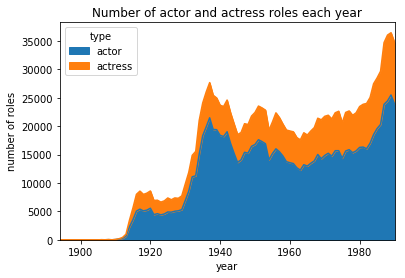

In [8]:
ax=c.plot(kind='area')
ax.set(ylabel="number of roles", title = 'Number of actor and actress roles each year');

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

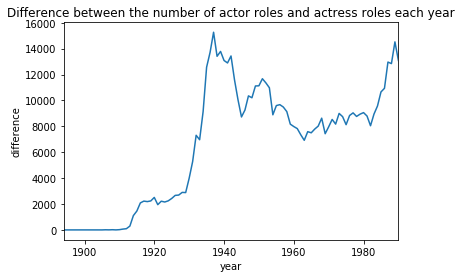

In [11]:
c=cast
c.head()
c=c.groupby(['year', 'type']).size()
c=c.unstack('type').fillna(0)
ax=(c.actor-c.actress).plot()
ax.set(ylabel="difference", title = 'Difference between the number of actor roles and actress roles each year');

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

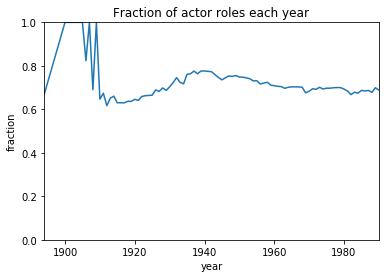

In [13]:
c=cast
c.head()
c=c.groupby(['year', 'type']).size()
c=c.unstack('type').fillna(0)
ax=(c.actor/(c.actor+c.actress)).plot(ylim=[0,1])
ax.set(ylabel="fraction", title = 'Fraction of actor roles each year');

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

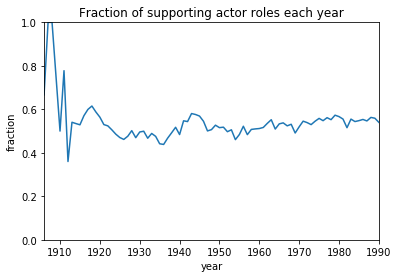

In [14]:
c=cast
c=c[c.n==2]
c=c.groupby(['year', 'type']).size()
c=c.unstack('type').fillna(0)
ax=(c.actor/(c.actor+c.actress)).plot(ylim=[0,1])
ax.set(ylabel="fraction", title = 'Fraction of supporting actor roles each year');